First 5 rows of matches dataset:
       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner

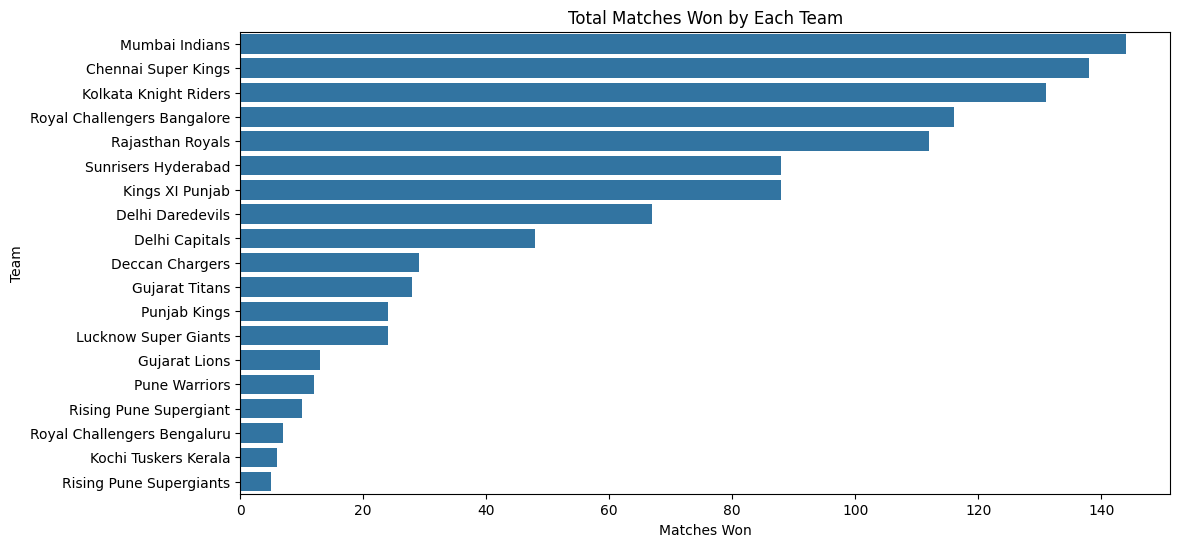


Toss decisions:
toss_decision
field    704
bat      391
Name: count, dtype: int64

Win Percentage After Toss:
toss_win_match_win
True     50.593607
False    49.406393
Name: proportion, dtype: float64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

print("First 5 rows of matches dataset:")
print(matches.head())

print("\nStructure of matches dataset:")
print(matches.info())

print("\nTotal matches played:", matches.shape[0])
print("Total seasons:", matches['season'].nunique())

print("\nMatches won by each team:")
print(matches['winner'].value_counts())

print("\nTop Player of the Match award winners:")
print(matches['player_of_match'].value_counts().head(10))

plt.figure(figsize=(12,6))
sns.countplot(y='winner', data=matches, order=matches['winner'].value_counts().index)
plt.title("Total Matches Won by Each Team")
plt.xlabel("Matches Won")
plt.ylabel("Team")
plt.show()

print("\nToss decisions:")
print(matches['toss_decision'].value_counts())

matches['toss_win_match_win'] = matches['toss_winner'] == matches['winner']
toss_success_rate = matches['toss_win_match_win'].value_counts(normalize=True) * 100
print("\nWin Percentage After Toss:")
print(toss_success_rate)

In [26]:
print(deliveries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [73]:
print("\nMost Runs")
top_scorers = deliveries.groupby('batter')['total_runs'].sum().sort_values(ascending=False).head(10)
print(top_scorers)
print("\nMost Wickets")
most_wickets = deliveries.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10)
print(most_wickets)

print("\nMost Sixes")
sixes = deliveries[deliveries['batsman_runs'] == 6]

sixes_by_player= sixes['batter'].value_counts()

print("Total 6s hit by each player:")
print(sixes_by_player.head(10))



Most Runs
batter
V Kohli           8307
S Dhawan          7119
DA Warner         6910
RG Sharma         6884
SK Raina          5780
MS Dhoni          5505
AB de Villiers    5354
CH Gayle          5336
RV Uthappa        5246
KD Karthik        5066
Name: total_runs, dtype: int64

Most Wickets
bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: is_wicket, dtype: int64

Most Sixes
Total 6s hit by each player:
batter
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
DA Warner         236
KA Pollard        224
AD Russell        209
SV Samson         206
SK Raina          204
Name: count, dtype: int64


In [72]:
print("\nHighest Individual Scores")
batsman_scores = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()


top_10_scores = batsman_scores.sort_values(by='batsman_runs', ascending=False).head(10)

print(top_10_scores)



Highest Individual Scores
       match_id          batter  batsman_runs
5302     598027        CH Gayle           175
2        335982     BB McCullum           158
14108   1304112       Q de Kock           140
7528     829795  AB de Villiers           133
11583   1216510        KL Rahul           132
15383   1370352    Shubman Gill           129
8359     980987  AB de Villiers           129
4687     548372        CH Gayle           128
10149   1136602         RR Pant           128
2237     419137         M Vijay           127


In [71]:
print("\nBatsmen Dismissed most times by a bowler")
wickets = deliveries[deliveries['player_dismissed'].notnull()]

dismissals = wickets.groupby(['bowler', 'player_dismissed']).size().reset_index(name='dismissal_count')

top_dismissals = dismissals.sort_values(by='dismissal_count', ascending=False).head(10)

print(top_dismissals)



Batsmen Dismissed most times by a bowler
               bowler player_dismissed  dismissal_count
8652        SP Narine        RG Sharma                8
5484        MM Sharma        AT Rayudu                7
8931   Sandeep Sharma          V Kohli                7
7246        RA Jadeja       GJ Maxwell                7
6666          PP Ojha         MS Dhoni                7
3679        JJ Bumrah          RR Pant                7
6871         R Ashwin       RV Uthappa                7
1193          B Kumar        AM Rahane                7
161          A Mishra        RG Sharma                7
10118          Z Khan         MS Dhoni                7


In [68]:
print("\nMost Sixes by a Batsman against a Bowler")
sixes = deliveries[deliveries['batsman_runs'] == 6]

sixes_by_pair = sixes.groupby(['batter', 'bowler']).size().reset_index(name='six_count')

top_six_pairs = sixes_by_pair.sort_values(by='six_count', ascending=False).head(10)

print(top_six_pairs)



Most Sixes by a Batsman against a Bowler
          batter          bowler  six_count
3007  KA Pollard        A Mishra         14
343   AD Russell  Mohammed Shami         12
1257    CH Gayle       PP Chawla         11
2276  GJ Maxwell        R Ashwin         11
3081  KA Pollard       RA Jadeja         11
6372    SK Raina       PP Chawla         10
1605   DA Warner       SP Narine          9
1183    CH Gayle         B Kumar          9
1622   DA Warner       YS Chahal          9
2257  GJ Maxwell       KV Sharma          9


In [69]:
print("\nMost Fours by a Batsman against a Bowler")
fours = deliveries[deliveries['batsman_runs'] == 4]

fours_by_pair = fours.groupby(['batter', 'bowler']).size().reset_index(name='four_count')

top_four_pairs = fours_by_pair.sort_values(by='four_count', ascending=False).head(10)

print(top_four_pairs)



Most Fours by a Batsman against a Bowler
          batter          bowler  four_count
9392   RG Sharma        UT Yadav          21
10128   S Dhawan  Mohammed Shami          20
2632   DA Warner       SP Narine          20
12483    V Kohli         B Kumar          20
10046   S Dhawan        DJ Bravo          20
12636    V Kohli        UT Yadav          19
10054   S Dhawan     DS Kulkarni          19
8114    PA Patel       MM Sharma          18
11445  SR Watson      SL Malinga          18
5599    KL Rahul       DL Chahar          17


In [70]:
print("\nMost Dot Balls by a Bowler to Batsman")

dots = deliveries[deliveries['batsman_runs'] == 0]

dots_by_pair = dots.groupby(['bowler', 'batter']).size().reset_index(name='dot_count')

top_dot_pairs = dots_by_pair.sort_values(by='dot_count', ascending=False).head(10)

print(top_dot_pairs)



Most Dot Balls by a Bowler to Batsman
                bowler     batter  dot_count
2827           B Kumar  AM Rahane         68
22059         UT Yadav  RG Sharma         57
20131        SP Narine  RG Sharma         56
22072         UT Yadav   SK Raina         54
14883          P Kumar   CH Gayle         53
3011           B Kumar  SR Watson         53
6659   Harbhajan Singh   CH Gayle         53
6775   Harbhajan Singh   S Dhawan         53
8659         JJ Bumrah   KL Rahul         52
16137         R Ashwin  RG Sharma         50


In [75]:
doubles = deliveries[deliveries['batsman_runs'] == 2]

doubles_by_player= doubles['batter'].value_counts()

print("Most doubles ran a player:")
print(doubles_by_player.head(10))

Most doubles ran a player:
batter
V Kohli           445
DA Warner         370
MS Dhoni          340
S Dhawan          299
SK Raina          271
AB de Villiers    268
RG Sharma         263
KD Karthik        258
AM Rahane         257
G Gambhir         249
Name: count, dtype: int64


In [76]:
triples = deliveries[deliveries['batsman_runs'] == 3]

triples_by_player= triples['batter'].value_counts()

print("Most triples ran a player:")
print(triples_by_player.head(10))

Most triples ran a player:
batter
DA Warner         24
S Dhawan          23
V Kohli           21
AM Rahane         19
F du Plessis      18
AB de Villiers    17
M Vijay           17
RV Uthappa        15
MS Dhoni          15
G Gambhir         15
Name: count, dtype: int64


<ipython-input-77-fc1a0f6550dc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dot_counts.values, y=dot_counts.index, palette='viridis')


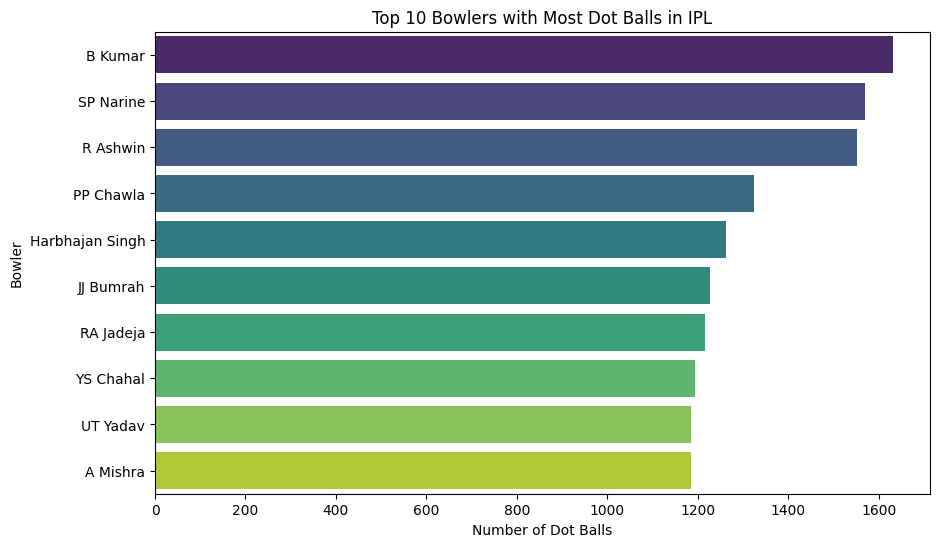

In [77]:
dot_balls = deliveries[deliveries['total_runs'] == 0]

dot_counts = dot_balls['bowler'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=dot_counts.values, y=dot_counts.index, palette='viridis')
plt.title('Top 10 Bowlers with Most Dot Balls in IPL')
plt.xlabel('Number of Dot Balls')
plt.ylabel('Bowler')
plt.show()


<ipython-input-78-496208e80355>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dot_counts.values, y=dot_counts.index, palette='viridis')


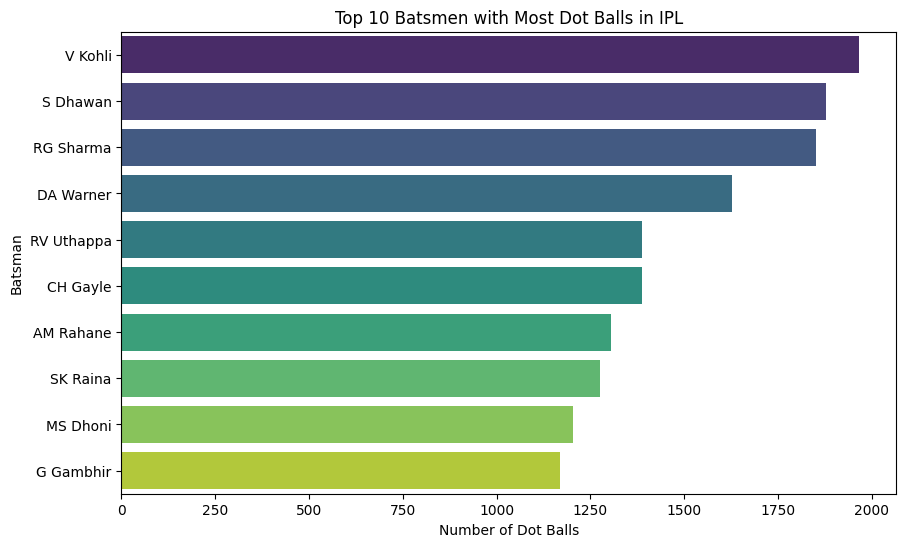

In [78]:
dot_balls = deliveries[deliveries['total_runs'] == 0]

dot_counts = dot_balls['batter'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=dot_counts.values, y=dot_counts.index, palette='viridis')
plt.title('Top 10 Batsmen with Most Dot Balls in IPL')
plt.xlabel('Number of Dot Balls')
plt.ylabel('Batsman')
plt.show()